# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 웹 크롤링 심화

### 맥도날드 지수 구하기 
- 사이트 : http://www.mcdonalds.co.kr/www/kor/findus/district.do
- 맥도날드 사이트에서 서울 지역의 매장검색
- 서울시 지도에 매장 분포도 작성
- 맥도널드는 어디에 가장 많은 매장을 가지고 있을까??

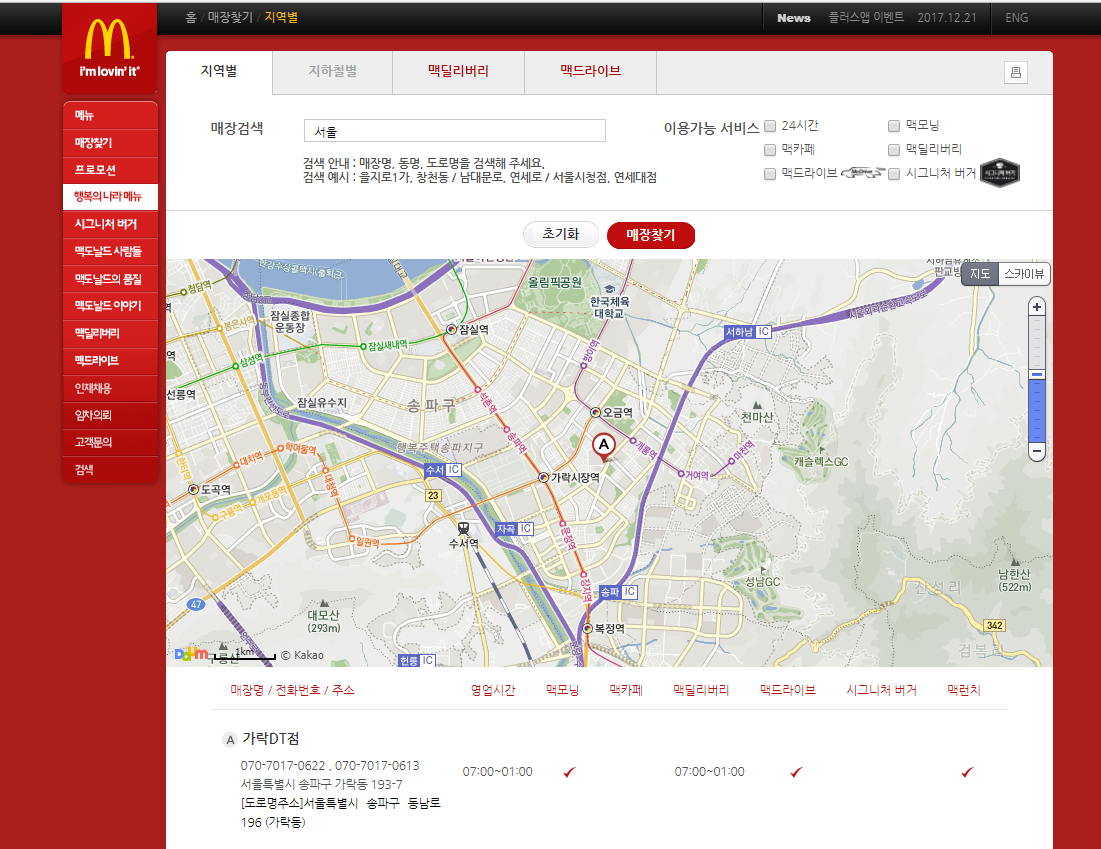

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 

Image(bpc.BDA_PE_420_1)

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd

In [3]:
html = 'http://www.mcdonalds.co.kr/www/kor/findus/district.do?pageIndex={page}&sSearch_yn=Y&skey=2&skey1=&skey2=&skeyword=%EC%84%9C%EC%9A%B8&skey4=&skey5=&skeyword2=&sflag1=&sflag2=&sflag3=&sflag4=&sflag5=&sflag6=&sflag=N'

response = urlopen(html.format(page=1))

soup = BeautifulSoup(response, "lxml")
soup.title

<title>지역별 - McDonald's</title>

In [4]:
tmp = soup.find_all('dl','clearFix')
tmp

[<dl class="clearFix">
 <dt><a href="javascript:moveMap('37.494879','127.130762');"> <img alt="A" src="../../common/images/kor/findus/1.gif"/> 가락DT점</a></dt>
 <dd>070-7017-0622
                                                         , 070-7017-0613
                                                         
                                                     </dd>
 <dd>서울특별시 송파구 가락동 193-7</dd>
 <!-- 도로명 검색주소 노출 -->
 <dd class="road">[도로명주소]서울특별시 송파구 동남로 196 (가락동)</dd>
 <dd class="infoCheck">
 <table border="0" cellpadding="5" cellspacing="5">
 <colgroup>
 <col style="width:70px"/>
 <col style="width:65.8px"/>
 <!-- <col style="width:65.8px" /> -->
 <col style="width:75.1px"/>
 <col style="width:102px"/>
 <col style="width:87px"/>
 <col style="width:72px"/>
 </colgroup>
 <tbody>
 <tr>
 <td>
 																		
 																			
 																			
 																			
 																			07:00~01:00
 																			
 																			
 																			
 																			


In [5]:
len(tmp)

5

In [6]:
tmp2 = tmp[0].get_text()
tmp2

'\n  가락DT점\n070-7017-0622\r\n                                                        , 070-7017-0613\r\n                                                        \r\n                                                    \n서울특별시 송파구 가락동 193-7\n\n[도로명주소]서울특별시 송파구 동남로 196 (가락동)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t07:00~01:00\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t

In [7]:
print(tmp2)


  가락DT점
070-7017-0622
                                                        , 070-7017-0613
                                                        
                                                    
서울특별시 송파구 가락동 193-7

[도로명주소]서울특별시 송파구 동남로 196 (가락동)














																		
																			
																			
																			
																			07:00~01:00
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																			
																		


In [8]:
tmp3 = tmp2.split('\n')
tmp3

['',
 '  가락DT점',
 '070-7017-0622\r',
 '                                                        , 070-7017-0613\r',
 '                                                        \r',
 '                                                    ',
 '서울특별시 송파구 가락동 193-7',
 '',
 '[도로명주소]서울특별시 송파구 동남로 196 (가락동)',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t07:00~01:00\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\

In [9]:
tmp3[1], tmp3[6], tmp3[8]

('  가락DT점', '서울특별시 송파구 가락동 193-7', '[도로명주소]서울특별시 송파구 동남로 196 (가락동)')

In [10]:
tmp3[1].replace(' ', '')

'가락DT점'

In [12]:
response = urlopen(html.format(page=25))

soup = BeautifulSoup(response, "lxml")
soup.title

<title>지역별 - McDonald's</title>

In [13]:
tmp = soup.find_all('dl','clearFix')
tmp

[]

In [12]:
len(tmp)

0

In [14]:
if len(tmp) is 0:
    print('Nothing')

Nothing


In [15]:
from itertools import count

for pg in count():
    if pg==5:
        break
    print(pg)

0
1
2
3
4


In [17]:
nameMCD = []
addMCDolder = []
addMCDnewer = []

html = 'http://www.mcdonalds.co.kr/www/kor/findus/district.do?pageIndex={page}&sSearch_yn=Y&skey=2&skey1=&skey2=&skeyword=%EC%84%9C%EC%9A%B8&skey4=&skey5=&skeyword2=&sflag1=&sflag2=&sflag3=&sflag4=&sflag5=&sflag6=&sflag=N'


for pg in count():
    page = pg+1
    response = urlopen(html.format(page=page))
    soup = BeautifulSoup(response, "lxml")
    tmp = soup.find_all('dl','clearFix')
    
    if len(tmp) is 0:
        print('crawling is finished !!')
        break
    
    print('crawling...%d' % page)
    for lenTmp in range(len(tmp)):
        tmp2 = tmp[lenTmp].get_text()
        tmp3 = tmp2.split('\n')
    
        nameMCD.append(tmp3[1].replace(' ', ''))
        addMCDolder.append(tmp3[6])
        addMCDnewer.append(tmp3[8])
        

crawling...1
crawling...2
crawling...3
crawling...4
crawling...5
crawling...6
crawling...7
crawling...8
crawling...9
crawling...10
crawling...11
crawling...12
crawling...13
crawling...14
crawling...15
crawling...16
crawling...17
crawling...18
crawling...19
crawling...20
crawling...21
crawling is finished !!


In [18]:
len(nameMCD), len(addMCDolder), len(addMCDnewer)

(101, 101, 101)

In [19]:
nameMCD

['가락DT점',
 '가산디지털점',
 '가산비지니스센터점',
 '강남2호점',
 '강남구청점',
 '강남삼성DT',
 '강동구청점',
 '고척DT',
 '공덕점',
 '과학기술대점',
 '구로디지탈',
 '구로애경점',
 '구산점',
 '구의역점',
 '굽은다리역DT',
 '노량진점',
 '대학로점',
 '등촌DT점',
 '마리오아울렛점',
 '망원점',
 '명동2호점',
 '명동점',
 '명지대점',
 '목동점',
 '미아DT점',
 '미아리점',
 '미아역점',
 '방배점',
 '방학역DT점',
 '보라매',
 '삼선교점',
 '삼성역점',
 '상계DT점',
 '상일동점',
 '서울교대점',
 '서울동묘역점',
 '서울둔촌DT',
 '서울번동DT점',
 '서울상암DMC',
 '서울시청점',
 '서울시흥DT점',
 '서울역점',
 '서초GS점',
 '서초뱅뱅점',
 '석촌역점',
 '선릉점',
 '성균관대점',
 '세이브존노원점',
 '송정역점',
 '송파잠실DT점',
 '수유점',
 '숭실대점',
 '신내점',
 '신도림테크노점',
 '신도림디큐브점',
 '신림점',
 '신사역점',
 '신월DT점',
 '신월SKDT점',
 '신천점',
 '쌍문DT점',
 '안국역점',
 '안암점',
 '압구정CGV점',
 '양재SKDT점',
 '양재점',
 '양천구청DT점',
 '양평SK점',
 '어린이대공원점',
 '여의도점',
 '연세대점',
 '연신내점',
 '염창DT점',
 '영등포점',
 '왕십리점',
 '우장산DT',
 '위례신도시점',
 '이마트상봉점',
 '이마트성수점',
 '이마트은평점',
 '이수점',
 '이태원점',
 '잠실역점',
 '장안사거리점',
 '전농점',
 '종로3가점',
 '종암SK점',
 '중계역점',
 '중계점',
 '중랑점',
 '중앙대점',
 '청담DT점',
 '코엑스',
 '파리공원점',
 '학동역',
 '한국외대점',
 '한양대점',
 '한티점',
 '합정메세나폴리스',
 '홍익대점',
 '홍제역점']

In [20]:
addMCDolder

['서울특별시 송파구 가락동 193-7',
 '서울특별시 금천구 가산동 50-3 대륭포스트타워6차 1층',
 '서울특별시 금천구 가산동 371-6 가산비지니스센터',
 '서울특별시 강남구 역삼동 822-2 비전타워 2층',
 '서울특별시 강남구 논현동 242-29',
 '서울특별시 강남구 삼성동 113-7',
 '서울특별시 강동구 성내동 539-2',
 '서울특별시 구로구 고척동 73-20',
 '서울특별시 마포구 도화동 559 마포트라팰리스 1층',
 '서울특별시 노원구 공릉동 435-2',
 '서울특별시 구로구 구로동 197-21 태평양물산 1층',
 '서울특별시 구로구 구로동 573 애경백화점',
 '서울특별시 은평구 구산동 1-14',
 '서울특별시 광진구 자양동 216-11',
 '서울특별시 강동구 천호동 31-10',
 '서울특별시 동작구 노량진1동 100-1',
 '서울특별시 종로구 동숭동 1-34',
 '서울특별시 강서구 등촌동 630',
 '서울특별시\xa0금천구 가산동 60-52 마리오 아울렛 1관',
 '서울 마포구 망원동 377-19',
 '서울특별시 중구 회현동3가 1-5',
 '서울특별시 중구 명동1가 48-2 1층',
 '서울특별시 서대문구 남가좌동 324-3',
 '서울특별시 양천구 신정동 899-6',
 '서울특별시 강북구 미아동 682-12',
 '서울특별시 강북구 미아동 71-5',
 '서울특별시 강북구 미아동 197-5',
 '서울특별시 서초구 방배동 909-9',
 '서울특별시 도봉구 도봉동 620-25',
 '서울특별시 영등포구 신길6동 505',
 '서울특별시 성북구 동소문동1가 32-3',
 '서울특별시 강남구 삼성동 158-15',
 '서울특별시 노원구 상계동 1022',
 '서울특별시 강동구 상일동 502, 502-1',
 '서울특별시 서초구 서초동 1674-5',
 '서울특별시 종로구 창신동 290',
 '서울특별시 강동구 둔촌동 517-2',
 '서울특별시 강북구 번동 106',
 '서울특별시 마포구 상암동 1

In [19]:
addMCDnewer

['[도로명주소]서울특별시 송파구 동남로 196 (가락동)',
 '[도로명주소]서울특별시 금천구 벚꽃로 298 (가산동)',
 '[도로명주소]서울특별시 금천구 가산디지털1로 165 (가산동)',
 '[도로명주소]서울특별시 강남구 테헤란로 107, 2층 (역삼동)',
 '[도로명주소]서울특별시 강남구 선릉로 667 (논현동)',
 '[도로명주소]서울특별시 강남구 봉은사로 432',
 '[도로명주소]서울특별시 강동구 성내로 15 (성내동)',
 '[도로명주소]서울특별시 구로구 경인로 393',
 '[도로명주소]서울특별시 마포구 마포대로 53 (도화동)',
 '[도로명주소]서울특별시 노원구 공릉로 231',
 '[도로명주소]서울특별시 구로구 디지털로31길 12 (구로동)',
 '[도로명주소]서울특별시 구로구 구로중앙로 152 (구로동)',
 '[도로명주소]서울특별시 은평구 연서로 131 (구산동)',
 '[도로명주소]서울특별시 광진구 아차산로 376 (자양동)',
 '[도로명주소]서울특별시 강동구 양재대로 1587',
 '[도로명주소]서울특별시 동작구 노량진로 158 (노량진동)',
 '[도로명주소]서울특별시 종로구 대학로 130 (동숭동)',
 '[도로명주소]서울특별시 강서구 양천로 546 (등촌동)',
 '[도로명주소]서울특별시 금천구 디지털로9길 23 (가산동)',
 '[도로명주소]서울 마포구 월드컵로 81',
 '[도로명주소]서울특별시 중구 퇴계로 116-1 (회현동3가)',
 '[도로명주소]서울특별시 중구 명동7길 8 (명동1가)',
 '[도로명주소]서울특별시 서대문구 거북골로 25 (남가좌동)',
 '[도로명주소]서울특별시 양천구 목동로 221 (신정동)',
 '[도로명주소]서울특별시 강북구 미아동 682-12',
 '[도로명주소]서울특별시 강북구 도봉로 48 (미아동)',
 '[도로명주소]서울특별시 강북구 도봉로 204 (미아동)',
 '[도로명주소]서울특별시 서초구 방배로 81 (방배동)',
 '[도로명주소]서울특별시 도봉구 도봉동 620-25',
 

In [21]:
addMCDolder[0].split()

['서울특별시', '송파구', '가락동', '193-7']

In [21]:
addMCDolder[25].split()

['서울특별시', '강북구', '미아동', '71-5']

In [22]:
addMCDolder[25].split()[1]

'강북구'

In [23]:
guNameMCD = [eachAddress.split()[1] for eachAddress in addMCDolder]
guNameMCD

['송파구',
 '금천구',
 '금천구',
 '강남구',
 '강남구',
 '강남구',
 '강동구',
 '구로구',
 '마포구',
 '노원구',
 '구로구',
 '구로구',
 '은평구',
 '광진구',
 '강동구',
 '동작구',
 '종로구',
 '강서구',
 '금천구',
 '마포구',
 '중구',
 '중구',
 '서대문구',
 '양천구',
 '강북구',
 '강북구',
 '강북구',
 '서초구',
 '도봉구',
 '영등포구',
 '성북구',
 '강남구',
 '노원구',
 '강동구',
 '서초구',
 '종로구',
 '강동구',
 '강북구',
 '마포구',
 '중구',
 '금천구',
 '용산구',
 '서초구',
 '서초구',
 '송파구',
 '강남구',
 '종로구',
 '노원구',
 '강서구',
 '송파구',
 '강북구',
 '동작구',
 '중랑구',
 '구로구',
 '구로구',
 '관악구',
 '강남구',
 '양천구',
 '양천구',
 '송파구',
 '도봉구',
 '종로구',
 '성북구',
 '강남구',
 '서초구',
 '서초구',
 '양천구',
 '영등포구',
 '광진구',
 '영등포구',
 '서대문구',
 '은평구',
 '강서구',
 '영등포구',
 '성동구',
 '강서구',
 '송파구',
 '중랑구',
 '성동구',
 '은평구',
 '동작구',
 '용산구',
 '송파구',
 '동대문구',
 '동대문구',
 '종로구',
 '성북구',
 '노원구',
 '노원구',
 '중랑구',
 '동작구',
 '강남구',
 '강남구',
 '양천구',
 '강남구',
 '동대문구',
 '성동구',
 '강남구',
 '마포구',
 '마포구',
 '서대문구']

In [24]:
dongNameMCD = [eachAddress.split()[2] for eachAddress in addMCDolder]
dongNameMCD

['가락동',
 '가산동',
 '가산동',
 '역삼동',
 '논현동',
 '삼성동',
 '성내동',
 '고척동',
 '도화동',
 '공릉동',
 '구로동',
 '구로동',
 '구산동',
 '자양동',
 '천호동',
 '노량진1동',
 '동숭동',
 '등촌동',
 '가산동',
 '망원동',
 '회현동3가',
 '명동1가',
 '남가좌동',
 '신정동',
 '미아동',
 '미아동',
 '미아동',
 '방배동',
 '도봉동',
 '신길6동',
 '동소문동1가',
 '삼성동',
 '상계동',
 '상일동',
 '서초동',
 '창신동',
 '둔촌동',
 '번동',
 '상암동',
 '을지로1가',
 '시흥동',
 '동자동',
 '서초동',
 '서초동',
 '송파동',
 '역삼동',
 '명륜2가',
 '하계동',
 '공항동',
 '잠실동',
 '번동',
 '상도동',
 '신내동',
 '구로동',
 '신도림동',
 '신림동',
 '신사동',
 '신월동',
 '신월동',
 '잠실동',
 '쌍문동',
 '안국동',
 '안암동5가',
 '신사동',
 '양재동',
 '양재동',
 '신정동',
 '양평동3가',
 '화양동',
 '여의도동',
 '창천동',
 '갈현동',
 '염창동',
 '영등포동3가',
 '행당동',
 '화곡동',
 '장지동',
 '망우동',
 '성수동2가',
 '응암동',
 '사당동',
 '이태원동',
 '신천동',
 '장안동',
 '전농동',
 '종로3가',
 '종암동',
 '상계동',
 '중계동',
 '상봉동',
 '흑석동',
 '청담동',
 '삼성동',
 '목동',
 '논현동',
 '이문동',
 '행당동',
 '대치동',
 '서교동',
 '동교동',
 '홍제동']

In [25]:
resultMCD = pd.DataFrame({'MACDONALD_Store':nameMCD, 
                          '구':guNameMCD, 
                          '동':dongNameMCD, 
                          '주소(지번)':addMCDolder, 
                          '주소(도로)':addMCDnewer})

resultMCD.head(10)

,MACDONALD_Store,구,동,주소(지번),주소(도로)
0,가락DT점,송파구,가락동,서울특별시 송파구 가락동 193-7,[도로명주소]서울특별시 송파구 동남로 196 (가락동)
1,가산디지털점,금천구,가산동,서울특별시 금천구 가산동 50-3 대륭포스트타워6차 1층,[도로명주소]서울특별시 금천구 벚꽃로 298 (가산동)
2,가산비지니스센터점,금천구,가산동,서울특별시 금천구 가산동 371-6 가산비지니스센터,[도로명주소]서울특별시 금천구 가산디지털1로 165 (가산동)
3,강남2호점,강남구,역삼동,서울특별시 강남구 역삼동 822-2 비전타워 2층,"[도로명주소]서울특별시 강남구 테헤란로 107, 2층 (역삼동)"
4,강남구청점,강남구,논현동,서울특별시 강남구 논현동 242-29,[도로명주소]서울특별시 강남구 선릉로 667 (논현동)
5,강남삼성DT,강남구,삼성동,서울특별시 강남구 삼성동 113-7,[도로명주소]서울특별시 강남구 봉은사로 432
6,강동구청점,강동구,성내동,서울특별시 강동구 성내동 539-2,[도로명주소]서울특별시 강동구 성내로 15 (성내동)
7,고척DT,구로구,고척동,서울특별시 구로구 고척동 73-20,[도로명주소]서울특별시 구로구 경인로 393
8,공덕점,마포구,도화동,서울특별시 마포구 도화동 559 마포트라팰리스 1층,[도로명주소]서울특별시 마포구 마포대로 53 (도화동)
9,과학기술대점,노원구,공릉동,서울특별시 노원구 공릉동 435-2,[도로명주소]서울특별시 노원구 공릉로 231


In [26]:
resultMCD['구'].unique()

array(['송파구', '금천구', '강남구', '강동구', '구로구', '마포구', '노원구', '은평구', '광진구',
       '동작구', '종로구', '강서구', '중구', '서대문구', '양천구', '강북구', '서초구', '도봉구',
       '영등포구', '성북구', '용산구', '중랑구', '관악구', '성동구', '동대문구'], dtype=object)

In [27]:
resultMCD['구'].value_counts()

강남구     11
송파구      6
서초구      6
구로구      5
종로구      5
양천구      5
마포구      5
강북구      5
노원구      5
금천구      4
동작구      4
영등포구     4
강서구      4
강동구      4
은평구      3
서대문구     3
중구       3
동대문구     3
성동구      3
중랑구      3
성북구      3
용산구      2
도봉구      2
광진구      2
관악구      1
Name: 구, dtype: int64

In [28]:
tmpCounts = resultMCD['구'].value_counts()
tmpCounts.head()

강남구    11
송파구     6
서초구     6
구로구     5
종로구     5
Name: 구, dtype: int64

In [29]:
tmpCounts.index

Index(['강남구', '송파구', '서초구', '구로구', '종로구', '양천구', '마포구', '강북구', '노원구', '금천구',
       '동작구', '영등포구', '강서구', '강동구', '은평구', '서대문구', '중구', '동대문구', '성동구', '중랑구',
       '성북구', '용산구', '도봉구', '광진구', '관악구'],
      dtype='object')

In [30]:
# population = pd.read_csv('data/seoul_population.csv', sep=',', encoding='utf-8')
population = pd.read_csv('data/seoul_population_cctv.csv', sep=',', encoding='euc-kr')
population.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


In [31]:
population.set_index('구', inplace=True)
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구,,,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


In [32]:
tmpCounts

강남구     11
송파구      6
서초구      6
구로구      5
종로구      5
양천구      5
마포구      5
강북구      5
노원구      5
금천구      4
동작구      4
영등포구     4
강서구      4
강동구      4
은평구      3
서대문구     3
중구       3
동대문구     3
성동구      3
중랑구      3
성북구      3
용산구      2
도봉구      2
광진구      2
관악구      1
Name: 구, dtype: int64

In [33]:
# 읽어온 파일에 구별 맥도날드 수 추가
population = pd.concat([population, tmpCounts], axis=1)
population.head()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,구
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,11
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648,4
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,4
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,1


In [34]:
population.rename(columns = {'구':'맥도날드'}, inplace=True)

In [35]:
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,맥도날드
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,11
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648,4
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,4
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,1


In [36]:
population['맥도날드'] / population['인구수'] * 100 * 10000

강남구     20.027128
강동구      9.195571
강북구     15.418964
강서구      6.610827
관악구      1.916866
광진구      5.405420
구로구     11.383454
금천구     15.850435
노원구      9.073274
도봉구      5.831074
동대문구     8.194460
동작구      9.805724
마포구     12.985934
서대문구     9.302412
서초구     13.588834
성동구      9.457845
성북구      6.672984
송파구      8.907601
양천구     10.639543
영등포구     9.907759
용산구      8.160368
은평구      6.149444
종로구     30.658671
중구      22.179834
중랑구      7.333923
dtype: float64

In [37]:
population['맥버거지표'] = population['맥도날드'] / population['인구수'] * 100 * 10000

In [38]:
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,맥도날드,맥버거지표
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,11,20.027128
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648,4,9.195571
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5,15.418964
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,4,6.610827
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,1,1.916866


In [39]:
population.sort_values(by='맥도날드', ascending=False).head(10)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,맥도날드,맥버거지표
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,11,20.027128
송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414,6,8.907601
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750,6,13.588834
노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770,5,9.073274
종로구,1619,248.922414,73696,163086,153396,9690,26622,5.941650,16.323903,0.992728,362.934662,5,30.658671
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889,5,10.639543
마포구,980,212.101911,171320,385032,374106,10926,50559,2.837686,13.131116,0.254524,516.168479,5,12.985934
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,0.428929,329.195319,5,11.383454
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5,15.418964
금천구,1348,100.000000,106774,252359,232760,19599,35299,7.766317,13.987613,0.534160,4.641657,4,15.850435


In [39]:
population.sort_values(by='인구수', ascending=False).head(10)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,맥도날드,맥버거지표
송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414,6,8.907601
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,4,6.610827
노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770,5,9.073274
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,11,20.027128
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,1,1.916866
은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394,0.432101,500.603184,3,6.149444
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889,5,10.639543
성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425,0.367237,85.009416,3,6.672984
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750,6,13.588834
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,0.428929,329.195319,5,11.383454


In [40]:
population.sort_values(by='맥버거지표', ascending=False).head(10)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,맥도날드,맥버거지표
종로구,1619,248.922414,73696,163086,153396,9690,26622,5.941650,16.323903,0.992728,362.934662,5,30.658671
중구,1023,147.699758,61232,135258,125815,9443,21902,6.981472,16.192758,0.756332,202.960762,3,22.179834
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,11,20.027128
금천구,1348,100.000000,106774,252359,232760,19599,35299,7.766317,13.987613,0.534160,4.641657,4,15.850435
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5,15.418964
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750,6,13.588834
마포구,980,212.101911,171320,385032,374106,10926,50559,2.837686,13.131116,0.254524,516.168479,5,12.985934
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,0.428929,329.195319,5,11.383454
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889,5,10.639543
영등포구,1277,157.979798,170208,403724,368577,35147,55364,8.705700,13.713329,0.316305,239.389649,4,9.907759


In [41]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

macDat = pd.DataFrame({'gu':population.index, 'counts':population['맥버거지표']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=macDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [42]:
map

In [43]:
population

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,맥도날드,맥버거지표
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,11,20.027128
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648,4,9.195571
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5,15.418964
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,4,6.610827
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,1,1.916866
광진구,878,53.228621,161714,369999,355032,14967,45202,4.045146,12.216790,0.237298,601.905647,2,5.405420
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,0.428929,329.195319,5,11.383454
금천구,1348,100.000000,106774,252359,232760,19599,35299,7.766317,13.987613,0.534160,4.641657,4,15.850435
노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770,5,9.073274
도봉구,825,246.638655,137901,342990,340876,2114,55499,0.616344,16.180938,0.240532,625.687072,2,5.831074


In [44]:
population.to_csv('data/seoul_population_mac-idx.csv', sep=',', encoding='euc-kr')

### <font color='brown'> seqborn이 제공해주는 pairplot 을 사용해서 분석 </font>

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize']=(10,6)

In [46]:
sns.set()
sns.set_style('darkgrid')
sns.set(font="Malgun Gothic")
sns.set_color_codes()

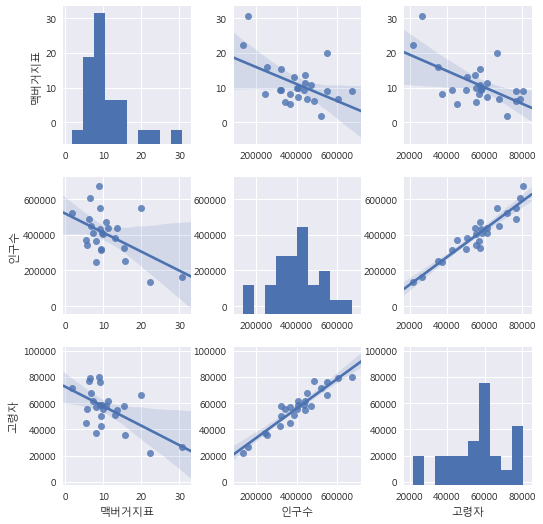

In [48]:
sns.pairplot(population, vars=["맥버거지표", "인구수", "고령자"], kind="reg");

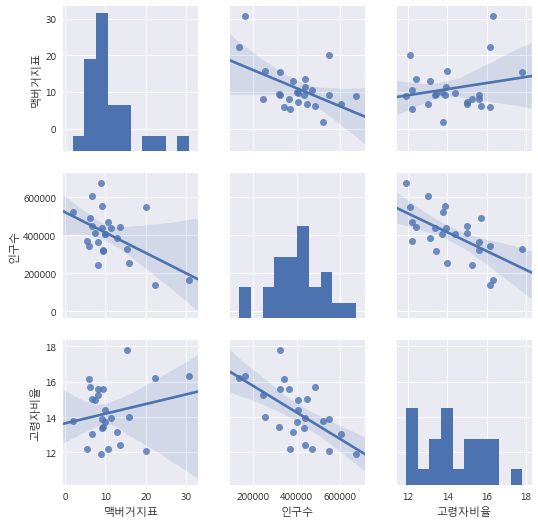

In [47]:
sns.pairplot(population, vars=["맥버거지표", "인구수", "고령자비율"], kind="reg");

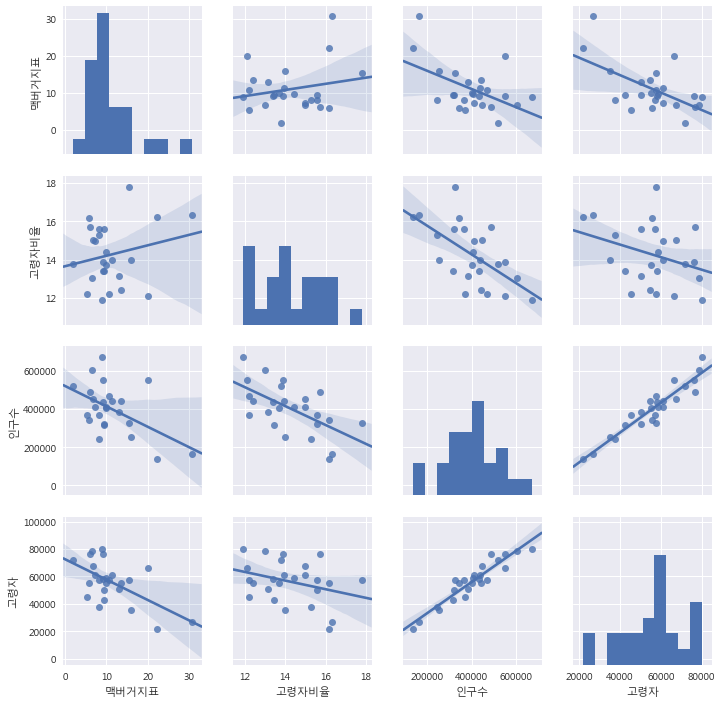

In [48]:
sns.pairplot(population, vars=["맥버거지표", "고령자비율", "인구수", "고령자"], kind="reg");

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>